<a href="https://colab.research.google.com/github/mlvlab/DFC609-2022S/blob/master/3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Lab 3. Regression </center>  


## Contents

---

[1.Linear Regression](#1.linear-regression)

[2.KNN Regression](#2.knn-regression)

[3.Kernel Regression](#3.kernel-regression)

---

## References
- load <u>weight-height.csv</u> from [Kaggle]
(https://www.kaggle.com/mustafaali96/weight-height?select=weight-height.csv)
  

---

<br>

# 1.linear regression

* 선형회귀 (Linear regression) 은 종속 변수 y와 하나 이상의 독립 변수 x와의 선형 상관 관계를 모델링하는 회귀분석 기법.
* 본 실습에서는 하나의 설명 변수에 기반한 단순 선형 회귀를 다룸.


- Model: &nbsp; \\(y = W^Tx + b\\)
    - x(설명 변수): `height`
    - y(종속 변수): `weight`
    
    
- Loss function (손실 함수): 모델과 실제 데이터간의 차이
    - Mean Squared Error; MSE (평균 제곱 오차) 를 사용.
    - \\( loss = \frac{1}{N}(\sum(W^Tx+b-y)^2)  \\)

## 1.1 Libraries

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt, exp

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

## 1.2 Load Dataset

In [30]:
!git clone https://github.com/mlvlab/DFC609-2022S.git

Cloning into 'DFC609-2022S'...
remote: Enumerating objects: 685, done.
remote: Counting objects: 100% (387/387), done.
remote: Compressing objects: 100% (262/262), done.
remote: Total 685 (delta 217), reused 228 (delta 123), pack-reused 298
Receiving objects: 100% (685/685), 10.20 MiB | 18.88 MiB/s, done.
Resolving deltas: 100% (400/400), done.


In [31]:
pwd

'/content/DFC609-2022S'

In [32]:
cd DFC609-2022S/

/content/DFC609-2022S/DFC609-2022S


In [33]:
ls

 1_Data_Loading_Loan_Data_from_Kaggle.ipynb   6_Clustering.ipynb
 2_Naive_Bayes_Classification.ipynb          'Loan payments data.csv'
 3_Regression.ipynb                           PastClasses.md
 4_Support_Vector_Machine.ipynb               README.md
 5_Decision_Tree.ipynb                        weight-height.csv


In [34]:
df=pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [35]:
df_height=df[['Height']]
df_height

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [36]:
df_weight=df[['Weight']]
df_weight

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
9995,136.777454
9996,170.867906
9997,128.475319
9998,163.852461


Text(0, 0.5, 'weight')

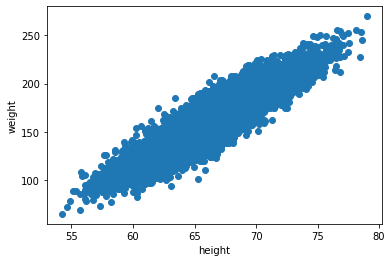

In [37]:
plt.scatter(x=df_height, y=df_weight)
plt.xlabel('height')
plt.ylabel('weight')

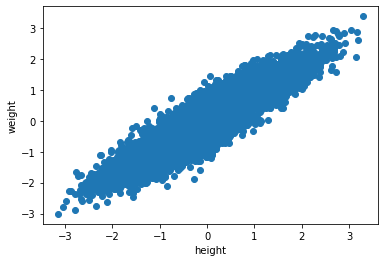

In [38]:
# Standardization
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

sc_X = sc_x.fit_transform(df_height)
sc_y = sc_y.fit_transform(df_weight)
plt.scatter(sc_X, sc_y)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

X_train: (400, 1)
X_test : (100, 1)
y_train: (400, 1)
y_test : (100, 1)


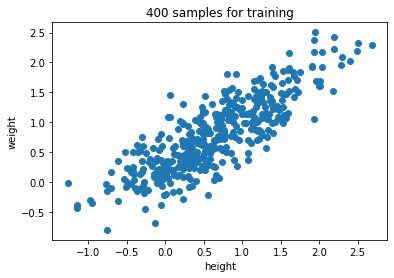

In [39]:
X = sc_X[:500]
y = sc_y[:500]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)
print('X_train:',X_train.shape)
print('X_test :',X_test.shape)
print('y_train:',y_train.shape)
print('y_test :',y_test.shape)

plt.title("400 samples for training")
plt.scatter(x=X_train, y=y_train)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

## 1.3 Model

In [40]:
class linear_regression:
    
    def __init__(self, x, y, weight, bias, learning_rate, epoch_number):
        self.x = x
        self.y = y
        self.w = weight
        self.b = bias
        self.lr = learning_rate
        self.epoch_n = epoch_number
        self.data_n = len(x)
        self.hist = {}
    
    def train(self):
        self.hist['loss'] = []
        for i in range(self.epoch_n):
            y_hat = self.w*self.x + self.b
            loss = np.sum((y_hat-self.y)**2) / self.data_n
            gradient_w = np.sum((y_hat-self.y)*(2*self.x)) / self.data_n
            gradient_b = np.sum((y_hat-self.y)*(2)) / self.data_n
            
            self.w -= (self.lr*gradient_w)
            self.b -= (self.lr*gradient_b)
            self.hist['loss'].append(loss)
            if i%100 ==0:
                print(f'Epochs {i}/{self.epoch_n}. loss:{loss:5f}. weight: {self.w:5f}. bias:{self.b:5f}')
                
        print('final weight: ',self.w)
        print('final bias: ',self.b)
        
    def hist(self):
        return self.hist
        
        
    def predict(self, x):
        y_pred = self.w*x + self.b
        
        return y_pred
    

## 1.4 Train

In [41]:
lin_reg = linear_regression(x=X_train, y=y_train, weight=0.0, bias=0.0, 
                            learning_rate=0.0001, epoch_number=20000)
lin_reg.train()


Epochs 0/20000. loss:0.986250. weight: 0.000171. bias:0.000158
Epochs 100/20000. loss:0.933872. weight: 0.017004. bias:0.015654
Epochs 200/20000. loss:0.884706. weight: 0.033344. bias:0.030633
Epochs 300/20000. loss:0.838554. weight: 0.049207. bias:0.045112
Epochs 400/20000. loss:0.795231. weight: 0.064608. bias:0.059105
Epochs 500/20000. loss:0.754561. weight: 0.079560. bias:0.072629
Epochs 600/20000. loss:0.716383. weight: 0.094078. bias:0.085698
Epochs 700/20000. loss:0.680542. weight: 0.108174. bias:0.098327
Epochs 800/20000. loss:0.646894. weight: 0.121863. bias:0.110530
Epochs 900/20000. loss:0.615305. weight: 0.135156. bias:0.122320
Epochs 1000/20000. loss:0.585648. weight: 0.148066. bias:0.133711
Epochs 1100/20000. loss:0.557803. weight: 0.160604. bias:0.144715
Epochs 1200/20000. loss:0.531660. weight: 0.172783. bias:0.155344
Epochs 1300/20000. loss:0.507114. weight: 0.184612. bias:0.165610
Epochs 1400/20000. loss:0.484066. weight: 0.196103. bias:0.175525
Epochs 1500/20000. los

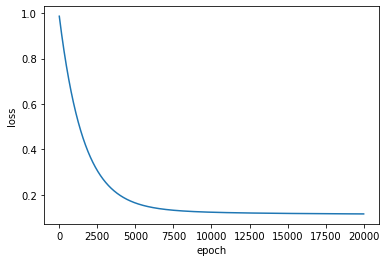

In [42]:
plt.plot(lin_reg.hist['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 1.5 Predict

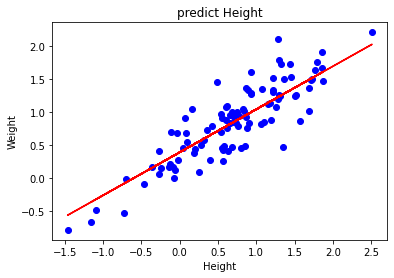

In [43]:
y_pred = lin_reg.predict(X_test)
plt.title('predict Height')
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='r')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

<br>

# 2.knn regression

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
test_score = []
for k in range(1,201):
    # 1. model
    knn_reg = KNeighborsRegressor(n_neighbors=k, weights='distance', p=1) # manhattan_distance 
    # 2. train
    knn_reg.fit(X_train, y_train)
    test_score.append(knn_reg.score(X_test, y_test))

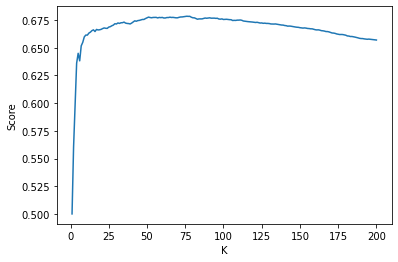

In [46]:
plt.plot(range(1,201), test_score)
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [47]:
k_max = test_score.index(max(test_score))
print(f"At k={k_max}, Max Accuracy={max(test_score)*100}")

At k=75, Max Accuracy=67.840301707212


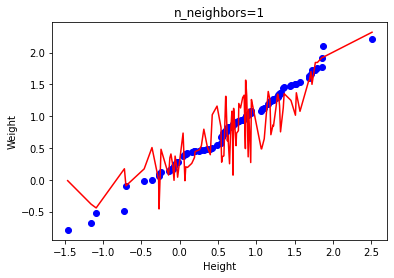

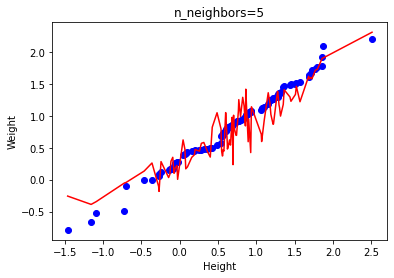

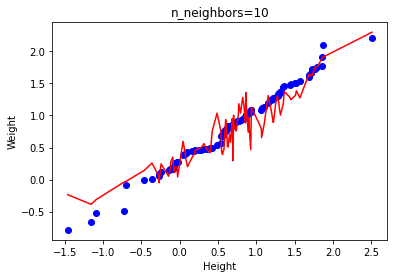

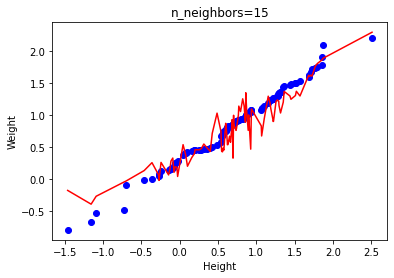

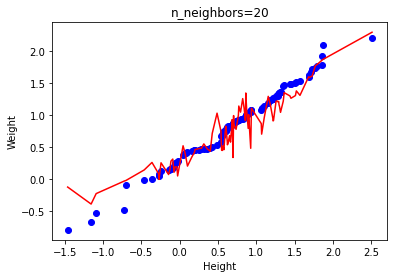

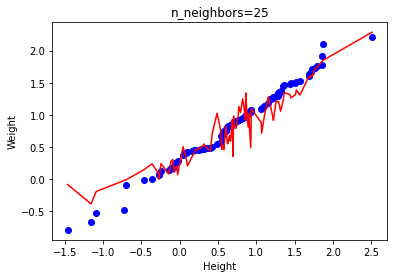

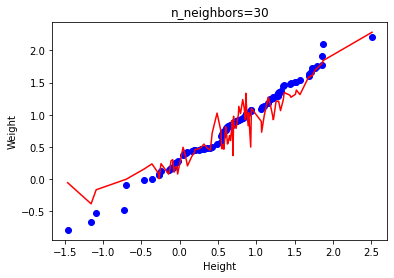

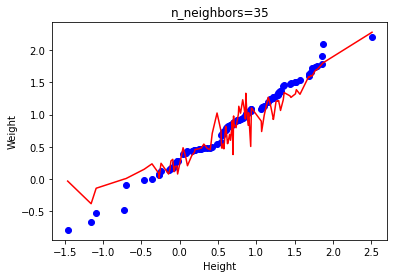

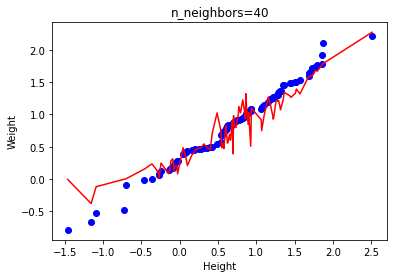

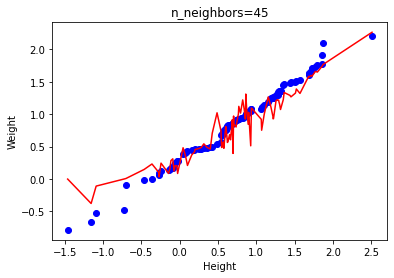

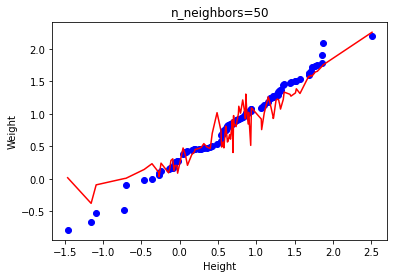

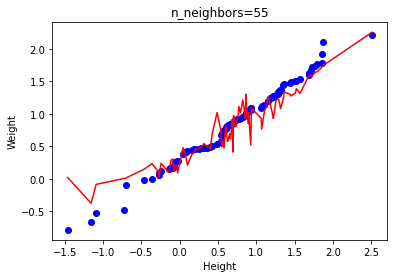

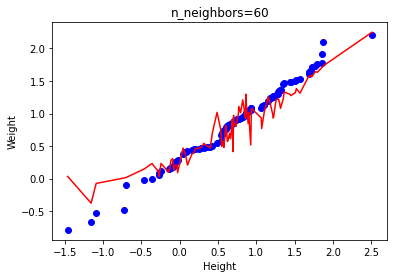

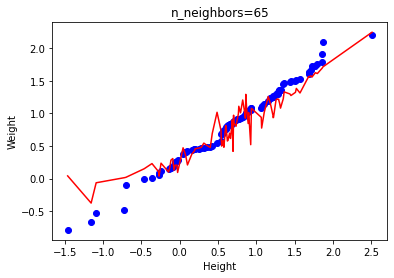

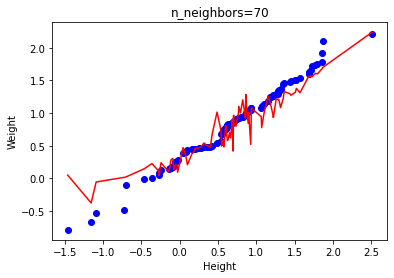

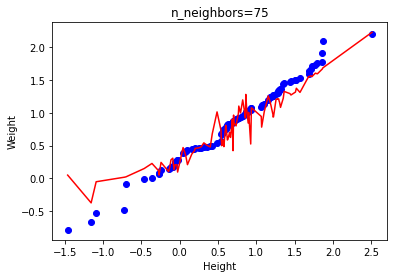

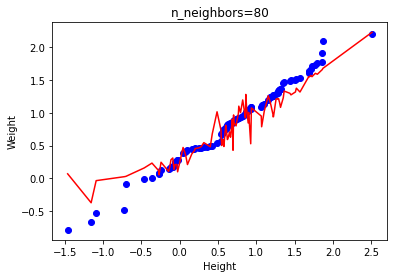

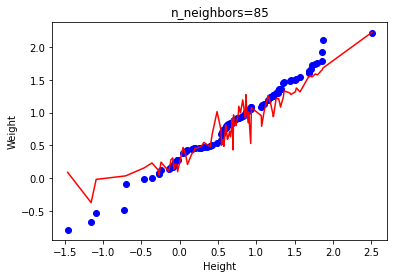

In [48]:
X_train_re = X_train.reshape(-1,1)
y_train_re = y_train.reshape(-1,1)
X_test_re = np.array(sorted(X_test.reshape(-1,1)))
y_test_re = np.array(sorted(y_test.reshape(-1,1)))

for k in np.arange(0,90,5):
    if k==0:
        k+=1
    knn_reg = KNeighborsRegressor(n_neighbors=k, weights='distance', p=1)
    knn_reg.fit(X_train_re, y_train_re)
    y_pred = knn_reg.predict(X_test_re)
    plt.scatter(X_test_re, y_test_re, color='b')
    plt.plot(X_test_re, y_pred, color='r')
    plt.title(f'n_neighbors={k}')
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.show()

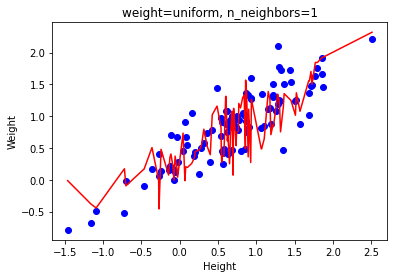

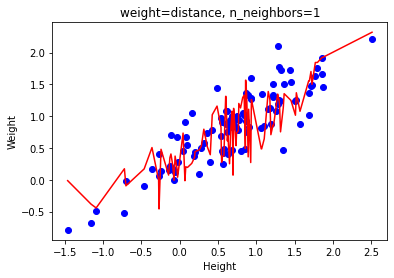

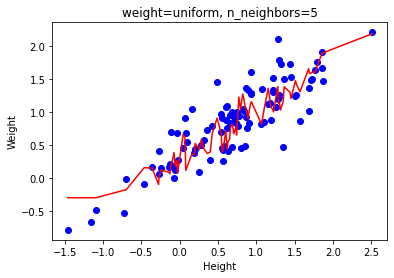

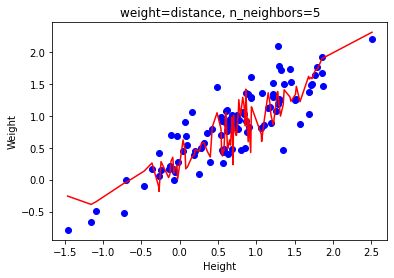

In [49]:

X_test_sorted = np.array(sorted(X_test.reshape(-1,1)))
y_test_sorted = np.array(sorted(y_test.reshape(-1,1)))

for k in [1,5]:
    for w in ['uniform', 'distance']:
        knn_reg = KNeighborsRegressor(n_neighbors=k, weights=w, p=1)
        knn_reg.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
        y_pred = knn_reg.predict(X_test_sorted)
        plt.scatter(X_test.reshape(-1,1), y_test.reshape(-1,1), color='b')
        plt.plot(X_test_sorted, y_pred, color='r')
        plt.title(f'weight={w}, n_neighbors={k}')
        plt.xlabel('Height')
        plt.ylabel('Weight')
        plt.show()
    

<br>

# 3.kernel regression

* Kernel regession 은 non-parametric 방법으로 확률 변수의 조건부 기대값을 예측하는 방법

    * \\( m_h(x) = \frac{\sum_{i}K_h (x - x_i) y_i}{\sum_j K_h (x - x_j)}   \\)
    * \\( K_h : \\) kernel with a bandwith h

In [50]:
class Gaussian_Kernel_Regression:
    
    def __init__(self, x, y, b):
        self.x = x
        self.y = y
        self.b = b
        
    def gaussian_kernel(self, x):
        return (1 / math.sqrt(2*math.pi))*math.exp(-0.5*x**2)

    def predict(self, x):
        kernels = [ self.gaussian_kernel((xi-x)/self.b) for xi in self.x ]
        y_pred = np.dot([ (kernel/np.sum(kernels)) for kernel in kernels ], self.y)
        return y_pred

    

Text(0.5, 1.0, 'Kernel regression. bandwidth = 0.05')

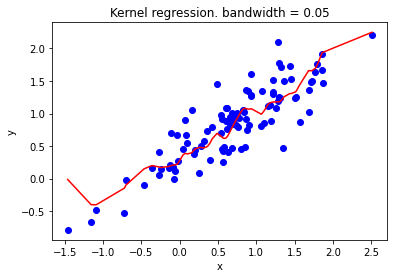

In [51]:
# bandwidth = 0.05
gkr = Gaussian_Kernel_Regression(X_train.reshape(-1,1), y_train.reshape(-1,1), 0.05)
y_pred = [ gkr.predict(x_i) for x_i in X_test_sorted ]
plt.scatter(X_test.reshape(-1,1), y_test.reshape(-1,1), color='b')
plt.plot(X_test_sorted, y_pred, color='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Kernel regression. bandwidth = 0.05')

Text(0.5, 1.0, 'Kernel regression. bandwidth = 0.5')

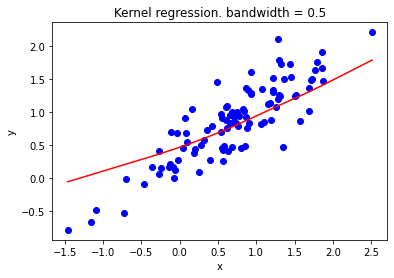

In [52]:
# bandwidth = 0.5
gkr = Gaussian_Kernel_Regression(X_train.reshape(-1,1), y_train.reshape(-1,1), 0.5)
y_pred = [ gkr.predict(x_i) for x_i in X_test_sorted ]
plt.scatter(X_test.reshape(-1,1), y_test.reshape(-1,1), color='b')
plt.plot(X_test_sorted, y_pred, color='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Kernel regression. bandwidth = 0.5')

Text(0.5, 1.0, 'Kernel regression. bandwidth = 5')

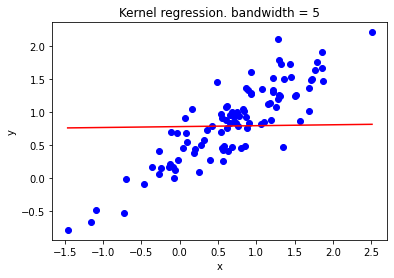

In [53]:
# bandwidth = 5
gkr = Gaussian_Kernel_Regression(X_train.reshape(-1,1), y_train.reshape(-1,1), 5)
y_pred = [ gkr.predict(x_i) for x_i in X_test_sorted ]
plt.scatter(X_test.reshape(-1,1), y_test.reshape(-1,1), color='b')
plt.plot(X_test_sorted, y_pred, color='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Kernel regression. bandwidth = 5')